In [1]:
import gc
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt

In [2]:
auctions = pd.read_csv('auctions.csv')

In [3]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ GB


In [4]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
auctions.isnull().sum()

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

In [6]:
#dropeo auction_type_id ya que todos sus valores son nulos y country porque todos tienen el mismo valor
auctions.drop(['auction_type_id', 'country'], axis=1, inplace=True)

In [7]:
auctions['date'] = pd.to_datetime(auctions['date'])

In [8]:
print('Rango fechas: ')
print(str(auctions['date'].min()))
print(str(auctions['date'].max()))

Rango fechas: 
2019-03-05 00:52:33.352526
2019-03-13 23:59:59.997032


In [9]:
auctions['day'] = auctions['date'].transform(lambda x : x.day)

In [10]:
auctions['hour'] = auctions['date'].transform(lambda x : x.hour)

Text(0.5, 1.0, 'Correlacion audiciones')

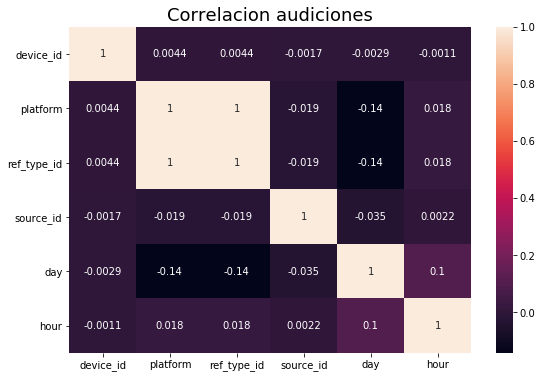

In [11]:
plt.figure(figsize=(9,6))
sns.heatmap(auctions.drop('date', axis=1).corr(), annot=True).set_title('Correlacion audiciones', fontsize=18)

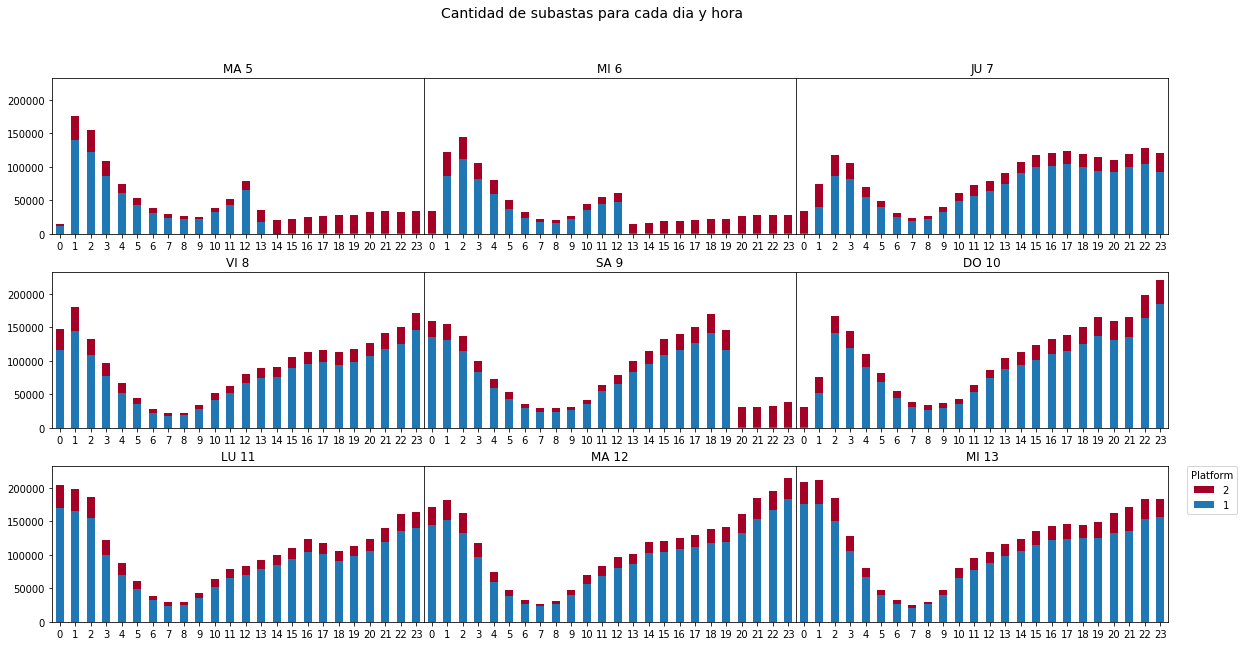

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
ax = ax.flatten()

fig.suptitle("Cantidad de subastas para cada dia y hora", fontsize=14)
plt.subplots_adjust(wspace=0, hspace=0.25)

diasDeLaSemana = ['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']

"Para ref_type_id = 7"
for idx, gp in auctions.groupby('day'):
    idx -= 5
    ax[idx].set_title(str(diasDeLaSemana[gp['date'].iloc[0].dayofweek]) + ' ' + str(gp['day'].iloc[0]))
    
    g = gp.groupby(gp['hour']).size().rename_axis([None]).to_frame().reindex(np.arange(0,24,1))\
        .plot(kind='bar', ax=ax[idx], rot=0, legend=False, colormap='RdYlGn')
    
    if idx%3 != 0:
        ax[idx].get_yaxis().set_visible(False)
        
        
"Para ref_type_id = 1"
for idx, gp in auctions[auctions['platform'] == 1].groupby('day'):
    idx -= 5
    
    g = gp.groupby(gp['hour']).size().rename_axis([None]).to_frame().reindex(np.arange(0,24,1))\
        .plot(kind='bar', ax=ax[idx], rot=0, legend=False)
    
    if idx%3 != 0:
        ax[idx].get_yaxis().set_visible(False)

        
lb, ub = list(zip(*[axis.get_ylim() for axis in ax]))
for axis in ax:
    axis.set_ylim(min(lb), max(ub))
    
plt.legend(labels=[2,1],title='Platform', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    
plt.show()

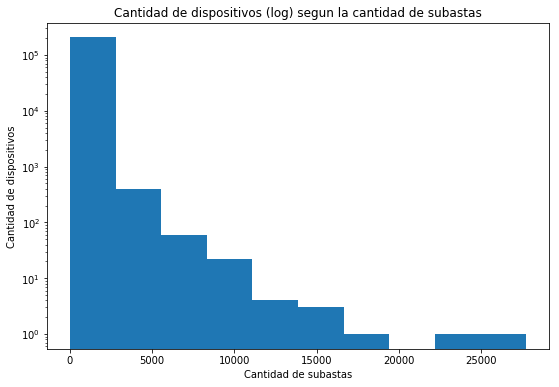

In [13]:
ax = auctions['device_id'].value_counts().plot(kind='hist', figsize=(9,6), title='Cantidad de dispositivos (log) segun la cantidad de subastas', logy=True)
plt.xlabel('Cantidad de subastas')
plt.ylabel('Cantidad de dispositivos')
plt.show()

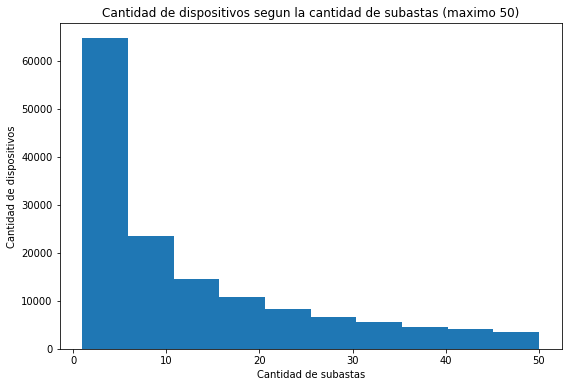

In [14]:
s = auctions['device_id'].value_counts()
ax = s[s <= 50].plot(kind='hist', figsize=(9,6), title='Cantidad de dispositivos segun la cantidad de subastas (maximo 50)')
plt.xlabel('Cantidad de subastas')
plt.ylabel('Cantidad de dispositivos')
plt.show()